In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
average_values = {
    'rice': {'N': 120, 'P': 30, 'K': 30, 'temperature': 29, 'humidity': 80, 'ph': 7, 'rainfall': 250},
    'maize': {'N': 120, 'P': 60, 'K': 40, 'temperature': 28, 'humidity': 60, 'ph': 6.5, 'rainfall': 200},
    'cotton': {'N': 50, 'P': 30, 'K': 35, 'temperature': 27, 'humidity': 70, 'ph': 7, 'rainfall': 150}
}
data = []
for label, values in average_values.items():
    for _ in range(3000):
        entry = {feature: np.random.normal(value, value * 0.1) for feature, value in values.items()}
        entry['label'] = label
        data.append(entry)
custom_dataset = pd.DataFrame(data)
custom_dataset = custom_dataset.sample(frac=1).reset_index(drop=True)
print(custom_dataset)

               N          P          K  temperature   humidity        ph  \
0     121.742817  30.261217  33.509022    29.925657  81.501103  6.879905   
1     109.926286  64.473327  39.555274    28.899599  64.090948  6.614587   
2     115.082970  26.089995  31.001011    27.590114  65.981712  7.403845   
3     123.011392  60.003712  41.605373    30.019175  64.135508  6.509898   
4      43.283661  34.740836  31.564029    26.957607  76.678354  6.958624   
...          ...        ...        ...          ...        ...       ...   
8995   52.061246  34.080224  39.831338    23.584823  70.587832  7.769822   
8996  123.782385  62.683018  42.141210    23.508616  67.102606  6.090802   
8997  115.938065  29.378611  31.544458    28.963913  90.306277  7.701912   
8998   57.118794  31.588811  34.382253    27.942807  67.217229  6.640572   
8999  128.894898  28.360026  25.673354    32.669387  95.275986  6.563847   

        rainfall   label  
0     258.970493    rice  
1     207.128342   maize  
2     

In [3]:
df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Save the DataFrame to a CSV file
df.to_csv('south_dataset.csv', index=False)

print("DataFrame saved to south_dataset.csv")

DataFrame saved to south_dataset.csv


In [4]:
custom_dataset.size

72000

In [5]:
custom_dataset.max()

N              164.971215
P               81.554259
K               52.194935
temperature     39.056024
humidity        102.89364
ph               9.848462
rainfall       329.665152
label                rice
dtype: object

In [6]:
new_df = custom_dataset[custom_dataset['label'].isin(['cotton', 'rice', 'maize'])]
new_df.reset_index(drop=True, inplace=True)
print(new_df)

               N          P          K  temperature   humidity        ph  \
0     121.742817  30.261217  33.509022    29.925657  81.501103  6.879905   
1     109.926286  64.473327  39.555274    28.899599  64.090948  6.614587   
2     115.082970  26.089995  31.001011    27.590114  65.981712  7.403845   
3     123.011392  60.003712  41.605373    30.019175  64.135508  6.509898   
4      43.283661  34.740836  31.564029    26.957607  76.678354  6.958624   
...          ...        ...        ...          ...        ...       ...   
8995   52.061246  34.080224  39.831338    23.584823  70.587832  7.769822   
8996  123.782385  62.683018  42.141210    23.508616  67.102606  6.090802   
8997  115.938065  29.378611  31.544458    28.963913  90.306277  7.701912   
8998   57.118794  31.588811  34.382253    27.942807  67.217229  6.640572   
8999  128.894898  28.360026  25.673354    32.669387  95.275986  6.563847   

        rainfall   label  
0     258.970493    rice  
1     207.128342   maize  
2     

In [7]:
new_df.max()

N              164.971215
P               81.554259
K               52.194935
temperature     39.056024
humidity        102.89364
ph               9.848462
rainfall       329.665152
label                rice
dtype: object

In [8]:
new_df.size

72000

In [9]:
new_df.shape

(9000, 8)

In [10]:
new_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
new_df['label'].unique()

array(['rice', 'maize', 'cotton'], dtype=object)

In [12]:
new_df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
new_df['label'].value_counts()

rice      3000
maize     3000
cotton    3000
Name: label, dtype: int64

<AxesSubplot: >

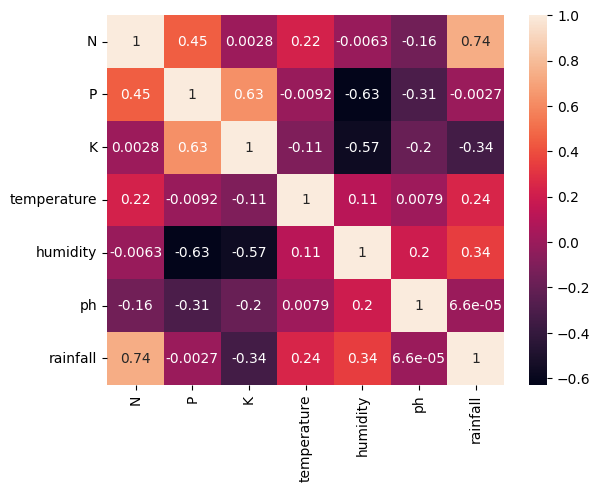

In [14]:
sns.heatmap(new_df.corr(),annot=True)

### Seperating features and target label

In [15]:
df = new_df

In [16]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [17]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [18]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [19]:
Xtrain.size, Xtest.size

(50400, 12600)

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       607
       maize       1.00      1.00      1.00       604
        rice       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [23]:
score

array([0.99944444, 1.        , 1.        , 0.99944444, 1.        ])

### Saving trained Decision Tree model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       607
       maize       1.00      1.00      1.00       604
        rice       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [26]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Guassian Naive Bayes model

In [27]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.7911111111111111
              precision    recall  f1-score   support

      cotton       1.00      0.67      0.80       607
       maize       0.62      1.00      0.76       604
        rice       1.00      0.70      0.83       589

    accuracy                           0.79      1800
   macro avg       0.87      0.79      0.80      1800
weighted avg       0.87      0.79      0.80      1800



In [29]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.77833333, 0.76222222, 0.76611111, 0.78444444, 0.77166667])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       607
       maize       1.00      1.00      1.00       604
        rice       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [31]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Logistic Regression model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       607
       maize       1.00      1.00      1.00       604
        rice       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [34]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1.        , 0.99944444, 1.        , 1.        , 1.        ])

### Saving trained Random Forest model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest_South.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [36]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable
label_encoder.fit(Ytrain)

# Transform both Ytrain and Ytest
Ytrain_encoded = label_encoder.transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Now train your XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values))


XGBoost's Accuracy is:  0.9994444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       604
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Initialize and train XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict on test data
predicted_values_encoded = XB.predict(Xtest)

# Decode the predicted values back to original labels
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is:", accuracy)

# Print classification report
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is: 0.9994444444444445
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       607
       maize       1.00      1.00      1.00       604
        rice       1.00      1.00      1.00       589

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

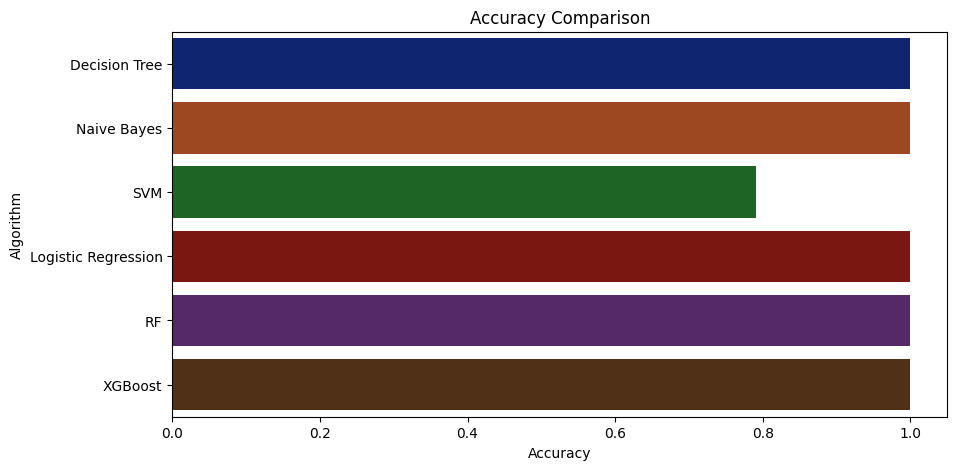

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [39]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 0.7911111111111111
Logistic Regression --> 1.0
RF --> 1.0
XGBoost --> 0.9994444444444445


In [40]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [41]:
data = np.array([[90,42, 43, 20, 82, 6.5, 140.91]])
prediction = RF.predict(data)
print(prediction)

['maize']
